In [4]:
import numpy as np 
import pandas as pd 
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
data = fetch_california_housing()

In [11]:
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [12]:
X = data.data
y_columns = data.feature_names

In [19]:
independent_variables = pd.DataFrame(X, columns=y_columns)
dependent_variables = pd.Series(data.target)

In [ ]:
print(dependent_variables.head())

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
dtype: float64


In [26]:
independent_variables.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


In [24]:
import seaborn as sns

<Axes: >

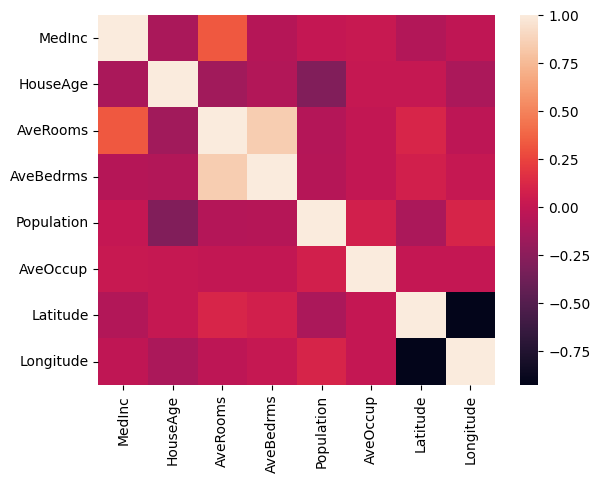

In [25]:
sns.heatmap(independent_variables.corr())

In [27]:
X_train, X_test, y_train, y_test = train_test_split(independent_variables, dependent_variables, shuffle=True, random_state=42)

In [28]:
model = LinearRegression()

In [29]:
model.fit(X_train, y_train)

LinearRegression()

In [35]:
model.predict(X_test)

array([0.72412832, 1.76677807, 2.71151581, ..., 1.72382152, 2.34689276,
       3.52917352])